## TunSwitch Dataset

### Data Preprocessing

In [43]:
import pandas as pd
df = pd.read_csv('3_final_merged_dataset.csv')

all_text = ' '.join(df['wrd'].astype(str))
words = all_text.split()
nan_count = words.count('nan')
print(f"Total nan words: {nan_count}")
if nan_count > 0:
    print(f"Found {nan_count} 'nan' strings in the word list, removing them.")
    words = [word for word in words if word != 'nan']
unique_words = set(words)
print(f"Total number of words (after removing 'nan'): {len(words)}")
print(f"Number of unique words: {len(unique_words)}")
print(f"Unique words: {unique_words}")

Total nan words: 0
Total number of words (after removing 'nan'): 18424
Number of unique words: 6779
Unique words: {'يأكد', 'والقيم', 'تحشيني', 'نعيشوا', 'ريزارفاسيون', 'بطبيعتي', 'للثلاثة', 'عجبكش', 'كائنات', 'القرية', 'بيني', 'نحتوا', 'هبطنا', 'خديجة', 'تحتيه', 'شيماء', 'راهم', 'بأسلوب', 'كأس', 'اسمها', 'للحلققرب', 'يتكيفوش', 'بالكاليس', 'للسياحة', 'وكل', 'بافاده', 'الموضوع', 'غريب', 'اشاعة', 'بهتت', 'سلمنا', 'همه', 'يساند', 'انحهالك', 'يبعثو', 'مدة', 'يغني', 'الاهتمام', 'يلزم', 'نحبه', 'تبهت', 'ريزارفيت', 'يعملوا', 'حبيتش', 'نسهل', 'لرجلها', 'ناصبة', 'والتوانسة', 'سفر', 'للأسف', 'هالنعمة', 'الحيوانات', 'قلي', 'وعلاش', 'سوم', 'وصلتلها', 'ترى', 'مالعسل', 'رجع', 'الفيس', 'بأحبابك', 'تفقد', 'ملفوفة', 'شخصيتنا', 'والا', 'مات', 'نوقف', 'تخسيب', 'نمكيج', 'طنجرة', 'ويتحكم', 'امو', 'الملح', 'مواجعنا', 'قهاوي', 'عالڨاز', 'يعاونوه', 'العرك', 'بطالة', 'صطمبالي', 'شريف', 'مخي', 'يرحمها', 'خوك', 'فرنك', 'ونتي', 'تحبست', 'تبدلهم', 'واقفة', 'بدنك', 'حومة', 'المؤسسات', 'خيارات', 'المشهد', 'عامة', 'ال

#### Suitable Format

In [1]:
import pandas as pd
df = pd.read_csv('2_final_merged_dataset.csv')

In [7]:
from pydub import AudioSegment

AudioSegment.converter = "C:/ffmpeg-2025-06-26-git-09cd38e9d5-essentials_build/ffmpeg-2025-06-26-git-09cd38e9d5-essentials_build/bin/ffmpeg.exe"

input_file = "global_audios/2_00_02_i03.wav"
output_file = "dataset\\processed_segments\\audio\\2_00_02_i03.wav"

audio = AudioSegment.from_file(input_file)
audio.export(output_file, format="wav", codec="pcm_s16le")
print(f"Converted {input_file} to {output_file}")


Converted global_audios/2_00_02_i03.wav to dataset\processed_segments\audio\2_00_02_i03.wav


In [ ]:
import pandas as pd
from pydub import AudioSegment
import os
import json

# Set FFmpeg path
AudioSegment.converter = "C:/ffmpeg-2025-06-26-git-09cd38e9d5-essentials_build/ffmpeg-2025-06-26-git-09cd38e9d5-essentials_build/bin/ffmpeg.exe"

# Input and output paths
output_dir = "dataset/processed_segments/audio"
os.makedirs(output_dir, exist_ok=True)

# Initialize lists for new dataset
new_rows = []

for index, row in df.iterrows():
    input_file = row["wav"]

    try:
        # Load audio
        audio = AudioSegment.from_file(input_file)
        output_file = os.path.join(output_dir, os.path.basename(input_file))
        audio.export(output_file, format="wav", codec="pcm_s16le")
        
        print(f"Converted {input_file} to {output_file}")
            
    except Exception as e:
        print(f"Error processing {input_file}: {e}")
        # Optionally, skip problematic files or log them
        continue

Converted audio_files/20_22_00_mjr.wav to dataset/processed_segments/audio\20_22_00_mjr.wav
Converted audio_files/62_02_19_quc.wav to dataset/processed_segments/audio\62_02_19_quc.wav
Converted audio_files/78_22_23_82f.wav to dataset/processed_segments/audio\78_22_23_82f.wav
Converted audio_files/31_21_52_s6d.wav to dataset/processed_segments/audio\31_21_52_s6d.wav
Converted audio_files/123_15_09_go2.wav to dataset/processed_segments/audio\123_15_09_go2.wav
Converted audio_files/3_12_47_l7u.wav to dataset/processed_segments/audio\3_12_47_l7u.wav
Converted audio_files/43_13_00_ymu.wav to dataset/processed_segments/audio\43_13_00_ymu.wav
Converted audio_files/61_14_26_nq3.wav to dataset/processed_segments/audio\61_14_26_nq3.wav
Converted audio_files/14_13_55_1r1.wav to dataset/processed_segments/audio\14_13_55_1r1.wav
Converted audio_files/94_22_46_vrc.wav to dataset/processed_segments/audio\94_22_46_vrc.wav
Converted audio_files/45_11_09_t8h.wav to dataset/processed_segments/audio\45_11

In [19]:
df['wav'] = df['wav'].str.replace('dataset/processed_segments/audio', 'dataset/processed_segments/audio/', regex=False)

In [20]:
df.to_csv('3_final_merged_dataset.csv', index=False)

In [21]:
import pandas as pd
df = pd.read_csv('3_final_merged_dataset.csv')

In [22]:
data_records = [] 

for index, row in df.iterrows():
    segment_filepath = row['wav']
    subtitle_text = row['wrd']
    data_records.append({
        "audio": {"path": segment_filepath},
        "text": subtitle_text
    })

In [24]:
data_records[0]

{'audio': {'path': 'dataset/processed_segments/audio/20_22_00_mjr.wav'},
 'text': 'يظهرلي اللي الدينا ولات تمشي بالمقلوب مادام كل شيء ولا فيها بالمقلوب العاقل فيها يتسمى'}

In [25]:
print("Audio segments and transcripts have been saved successfully.")
print(f"Total segments created: {len(data_records)}")
print('Exemple record:', data_records[8])

Audio segments and transcripts have been saved successfully.
Total segments created: 2228
Exemple record: {'audio': {'path': 'dataset/processed_segments/audio/14_13_55_1r1.wav'}, 'text': 'فما زيارة للبلاد'}


In [27]:
import json

# Save the metadata to a .jsonl file
metadata_jsonl_path = os.path.join('dataset', 'metadata.jsonl')
with open(metadata_jsonl_path, 'w', encoding='utf-8') as f:
    for record in data_records:
        f.write(json.dumps(record, ensure_ascii=False) + '\n') # ensure_ascii=False for Arabic characters

print(f"Generated {len(data_records)} audio segments and saved metadata to {metadata_jsonl_path}")

Generated 2228 audio segments and saved metadata to dataset\metadata.jsonl


#### Suitable Sampling Rate

In [28]:
from datasets import load_dataset, Audio
import os

data_dir = "data/processed_segments" 

dataset = load_dataset(
    "json",
    data_files=os.path.join('dataset', "metadata.jsonl"),
    split="train" 
)

# This will automatically load and resample the audio files to 16kHz
target_sampling_rate = 16000
dataset = dataset.cast_column("audio", Audio(sampling_rate=target_sampling_rate))

print(f"Dataset loaded. Number of examples: {len(dataset)}")
print(dataset[0])

c:\Users\cyrine.anene_amaris\.virtualenvs\AI-Enhanced-Eligibility-Checker-Mo6Xk0zX\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 2228 examples [00:00, 260797.87 examples/s]


Dataset loaded. Number of examples: 2228
{'audio': {'path': 'dataset/processed_segments/audio/20_22_00_mjr.wav', 'array': array([ 0.00000000e+00,  0.00000000e+00, -4.65661287e-10, ...,
        3.47513380e-03,  3.72133357e-03,  3.72680253e-03], shape=(91200,)), 'sampling_rate': 16000}, 'text': 'يظهرلي اللي الدينا ولات تمشي بالمقلوب مادام كل شيء ولا فيها بالمقلوب العاقل فيها يتسمى'}


### Load Whisper

In [30]:
from transformers import WhisperFeatureExtractor, WhisperTokenizer, WhisperProcessor

model_path = "openai/whisper-small"

feature_extractor = WhisperFeatureExtractor.from_pretrained(model_path)
tokenizer = WhisperTokenizer.from_pretrained(model_path, language="Arabic", task="transcribe")
processor = WhisperProcessor.from_pretrained(model_path, language="Arabic", task="transcribe")

c:\Users\cyrine.anene_amaris\.virtualenvs\AI-Enhanced-Eligibility-Checker-Mo6Xk0zX\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [34]:
text = dataset[0]['text']
print('True sentence in Natural Language is:\n' + text)
tok_sentence = tokenizer(text)
print('Tokenized sentence:')
print(tok_sentence)

True sentence in Natural Language is:
يظهرلي اللي الدينا ولات تمشي بالمقلوب مادام كل شيء ولا فيها بالمقلوب العاقل فيها يتسمى
Tokenized sentence:
{'input_ids': [50258, 50272, 50359, 50363, 1829, 19913, 3224, 2288, 20292, 13672, 1829, 2423, 16254, 8315, 35525, 9307, 46811, 8592, 1829, 20666, 2304, 4587, 1211, 37746, 3714, 18513, 10943, 28242, 44049, 38207, 49429, 8978, 11296, 20666, 2304, 4587, 1211, 37746, 18863, 995, 4587, 1211, 8978, 11296, 7251, 2655, 38251, 7578, 50257], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [35]:
from IPython.display import clear_output
import time

for idx in range(len(tok_sentence.input_ids)):
    print(tokenizer.decode(tok_sentence.input_ids[:idx]))
    clear_output(wait=True)
    time.sleep(.1)

<|startoftranscript|><|ar|><|transcribe|><|notimestamps|>يظهرلي اللي الدينا ولات تمشي بالمقلوب مادام كل شيء ولا فيها بالمقلوب العاقل فيها يتسمى


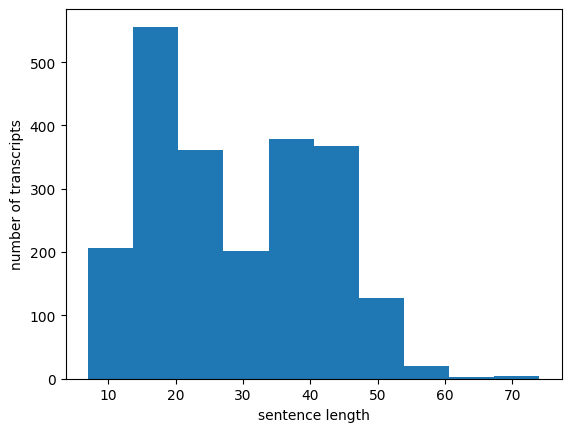

In [37]:
list_of_transcription_lengths = []
import matplotlib.pyplot as plt
tokenized_text = tokenizer(dataset['text']).input_ids

for text in tokenized_text:
    list_of_transcription_lengths.append(len(text))
    # break

plt.hist(list_of_transcription_lengths)
plt.xlabel("sentence length")
plt.ylabel("number of transcripts")
plt.show()

- ***X-axis: sentence length:*** It represents the length of each transcription (sentence) in your dataset, not in words or characters, but in tokens (as determined by the Whisper tokenizer).
- ***Y-axis: number of transcripts:*** It indicates the count of transcriptions that fall within each specific sentence length bin on the x-axis. A taller bar means more transcripts have a length within that range.

**Interpretation of the histogram:**
- ***First Peak at ~18-20 Tokens:*** It indicats that a significant portion of the transcriptions have lengths in this range (over 500 transcripts). => This suggests many of the audio segments correspond to relatively short spoken sentences.
- ***Second Peak at ~38-40 Tokens:*** There's another substantial peak around 38-40 tokens, with around 370-380 transcripts.
=> The presence of two distinct peaks suggests a ***bimodal distribution***. This means the dataset isn't just dominated by one typical sentence length but rather by two prevalent lengths. 
There's a long tail extending to the right, but with very few instances:
- Only a handful of transcripts are between 50-60 tokens.
- Very few transcripts are between 70-75 tokens.
- An even smaller number are between 60-70 tokens.

**Utility and Implications for Training:**

This plot is crucial for setting the ``generation_max_length`` in ``Seq2SeqTrainingArguments``. This parameter defines the maximum number of tokens the model is allowed to generate during inference and evaluation.
Based on this histogram, a ``generation_max_length`` around 60-70 tokens would cover almost all of our ground truth transcriptions.
These lengths also inform the padding strategy. Since there are varying lengths, padding is necessary. The ``DataCollatorSpeechSeq2SeqWithPadding`` class will handle this by padding input features and labels to the maximum length within each batch.

--------------------------------------------------

The next part is to test the original model's ability (before fine-tuning) to processes the first five audio samples, in tunisian dialect, from the dataset, transcribes them into text using the Whisper model, and compares the predicted transcriptions to the ground-truth transcriptions.

In [38]:
import torch
from transformers import WhisperForConditionalGeneration 

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small").to('cuda')
for idx in range(5):

    target = dataset[idx]['text']
    audio_original = dataset[idx]['audio']['array']
    original_sample_rate = dataset[idx]['audio']['sampling_rate']

    input_feature = feature_extractor(raw_speech=audio_original,
                                    sampling_rate=16000,
                                    return_tensors='pt').input_features

    with torch.no_grad():
        op = model.generate(input_feature.to('cuda'), language='arabic', task='transcribe')


    text_pred =  tokenizer.batch_decode(op,skip_special_tokens=True )[0]

    print(f'-------{idx}------')
    print(f'true : {target} \npred : {text_pred}')
    print('\n ')

c:\Users\cyrine.anene_amaris\.virtualenvs\AI-Enhanced-Eligibility-Checker-Mo6Xk0zX\lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


-------0------
true : يظهرلي اللي الدينا ولات تمشي بالمقلوب مادام كل شيء ولا فيها بالمقلوب العاقل فيها يتسمى 
pred :  يظهر لي للدنيا ولا تمشي بالمقلوب، مدام كل شيء ولا فاق بالمقلوب، العقل فيه يتسمى

 
-------1------
true : ميدة و جراية في دار مماتي ما كان حد يعاملني بالخايب اما انت تعرف اللي 
pred :  في ترمميتي مكان حاتي عملني بالخير ومنتي تعرفني

 
-------2------
true : كان تجيني وقتلي نبدى بين يدين قيصر خاطر اقصى ما ينجم يتعاش والا ينجم 
pred :  كان جيني يقتلين ابتبيني تين قيس الخطرات سمعيني جميع تعالش ولينجا

 
-------3------
true : البنات على خاطر برشة أسباب التصوحيب مضيعة للوقت هيا وينك و توحشتك و وقتاش نتقابلو 
pred :  لبنية على خطر برشة أسباب وتصحيب ماضي على الوقت، هيا وينيك وتوحاشتك ووقتش انتقابلو

 
-------4------
true : زهر الرعد زدم طوفان شعل بركان المحرم تذاق القلب فرناق والبدن 
pred :  زهر الرعد ستمتوا في شاعر بركان محرمت ذاك القلب فرنيك والبدن

 


## TARIC Dataset

In [44]:
import pandas as pd
df_taric = pd.read_csv('TARIC_dataset/Train_TARIC_SLU.csv')